# Introduction and Objectives

In this lab, we will work with data obtained from the FERMI instrument (Fermi Gamma-ray Space Telescope), a space telescope designed to study the universe in gamma rays. It was launched by NASA in 2008 and is one of the most important observatories for high-energy astrophysics. One of its key objectives is the observation of Gamma-Ray Bursts (GRBs).

We will download data files by making an HTTP request to the NASA catalog. Once the data is downloaded, we will work with it, create a light curve, and identify the emission peaks. Finally, we will extract the spectrum corresponding to the time intervals associated with these emission peaks.

# Libraries

We start by importing the necessary Python libraries: [urllib.request](https://docs.python.org/3/library/urllib.request.html#module-urllib.request) allows us to make HTTP requests such as downloading files, data_path manages file paths within the GDT package; [GbmTte](https://astro-gdt.readthedocs.io/projects/astro-gdt-fermi/en/latest/missions/fermi/gbm/tte.html) allows working with data from the GBM detector of the Fermi mission; [bin_by_time](https://fermi.gsfc.nasa.gov/ssc/data/analysis/gbm/gbm_data_tools/gdt-docs/notebooks/DataPrimitives.html) allows grouping data according to defined time intervals, which is useful for histograms or light curves, [matplotlib](https://matplotlib.org/stable/users/index.html) is used to [plot graphs](https://matplotlib.org/stable/gallery/), [Lightcurve](https://astro-gdt.readthedocs.io/en/latest/core/plot/lightcurve.html?utm_source=chatgpt.com) allows handling and plotting light curves, Spectrum is analogous to Lightcurve but for spectra, allowing the visualization of spectral data, and [combine_by_factor](https://fermi.gsfc.nasa.gov/ssc/data/analysis/gbm/gbm_data_tools/gdt-docs/api/api-binning.html#combine-into-one) allows combining already binned data by a certain factor, which is useful for improving the clarity of the visualized data.

In [1]:
import urllib.request
from gdt.core import data_path
from gdt.missions.fermi.gbm.tte import GbmTte
from gdt.core.binning.unbinned import bin_by_time
import matplotlib.pyplot as plt
from gdt.core.plot.lightcurve import Lightcurve
from gdt.core.plot.spectrum import Spectrum
from gdt.core.binning.binned import combine_by_factor

# Downloading files

Next, we download two gamma-ray data files from NASA's archive. First, we define the name of the GRB event, its identifier, and the year in which the event occurred. Then, based on this information, we construct the download URL and use urllib.request to download the files.

In [2]:
subobject = 'GRB 211211A'
trigger = '211211549'
date = '2021'

In [3]:
trigger_ = trigger
year_ = date

path_ = f'https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/{year_}/bn{trigger_}/current/'
file_fit = f'glg_tte_na_bn{trigger_}_v00.fit'
file_pha = f'glg_ctime_nb_bn{trigger_}_v00.pha'

urllib.request.urlretrieve(path_+file_fit, file_fit)
urllib.request.urlretrieve(path_+file_pha, file_pha)

('glg_ctime_nb_bn211211549_v00.pha',
 <http.client.HTTPMessage at 0x7a2131dd2810>)

# Data rebinning

To avoid issues, we group the channels; in other words, we convert the .pha file by rebinning the channel data. For more information, [click here](https://fermi.gsfc.nasa.gov/ssc/data/analysis/rmfit/gbm_data_tools/gdt-docs/notebooks/TteData.html)

We load a FITS file with TTE data from the Fermi GBM detector; now tte is an object that contains all the information.

In [4]:
tte = GbmTte.open('glg_tte_na_bn211211549_v00.fit')
tte

No.,Name,Ver,Type,Cards,Dimensions
0,PRIMARY,1,PrimaryHDU,30,()
1,EBOUNDS,1,BinTableHDU,47,128R x 3C
2,EVENTS,1,BinTableHDU,42,1024138R x 2C
3,GTI,1,BinTableHDU,42,1R x 2C


In [5]:
print(tte)

<GbmTte: glg_tte_na_bn211211549_v00.fit;
 trigger time: 660921004.65092;
 time range (np.float64(-132.336874127388), np.float64(482.07243597507477));
 energy range (3.668320417404175, 2000.0)>


With .gti we see the time intervals during the data are considered valid.

In [6]:
tte.gti

<Gti: 1 intervals; range (-132.336874127388, 482.07243597507477)>

With .time_range we obtain the full time interval of the data, that is, from the first to the last event.

In [7]:
tte.time_range

(np.float64(-132.336874127388), np.float64(482.07243597507477))

With .energy_range the energy range of the detected events is shown.

In [8]:
tte.energy_range

(3.668320417404175, 2000.0)

Next, we filter the data to keep only the events that occurred within the specified time interval.

In [9]:
time_sliced_tte = tte.slice_time([-10.0, 10.0])
print(time_sliced_tte)

<GbmTte: 
 trigger time: 660921004.65092;
 time range (np.float64(-9.999744057655334), np.float64(9.999860048294067));
 energy range (3.668320417404175, 2000.0)>


We apply a similar filter as before, but now for the energy.

In [10]:
energy_sliced_tte = tte.slice_energy([50.0, 300.0])
print(energy_sliced_tte)

<GbmTte: 
 trigger time: 660921004.65092;
 time range (np.float64(-132.33558213710785), np.float64(482.07243597507477));
 energy range (48.87697219848633, 303.12591552734375)>


We now perform a temporal rebinning of the data into 1.024 seconds bins; the resulting object contains the data ready for visualization.

In [11]:
phaii = tte.to_phaii(bin_by_time, 1.024, time_ref=0.0)
print(phaii)

<GbmPhaii: 
 trigger time: 660921004.65092;
 time range (np.float64(-133.12), np.float64(482.30400000000003));
 energy range (np.float64(3.668320417404175), np.float64(2000.0))>


We plot the light curve; phaii.to_lightcurve() converts the phaii object, which contains time-binned data, into a light curve. A lightcurve is a representation of how the intensity or brightness of an astronomical source changes over time, in our case, a GRB.

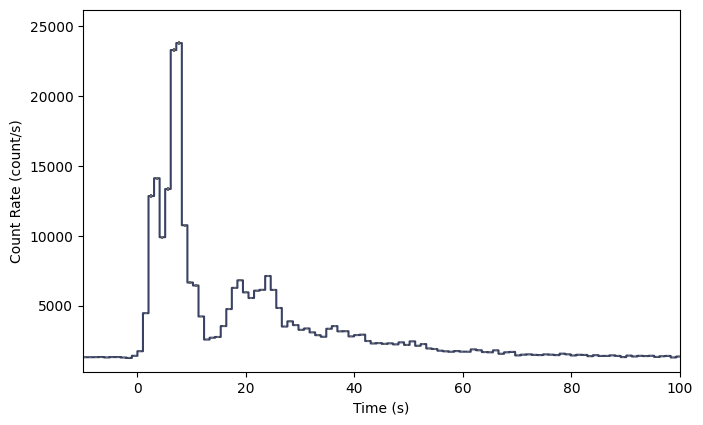

In [12]:
lcplot = Lightcurve(data=phaii.to_lightcurve())
plt.xlim(-10, 100)
plt.show()

The light curve of the Gamma-Ray Burst GRB 211211A shows that it is a long-duration GRB, as it displays activity for more than 2 seconds. We can observe that the main peak occurs around 0 to 30 seconds, followed by a decay lasting until approximately 60-70 seconds.

We now distinguish two regions in the plot and highlight them. The brown-shaded region between 0 and 12 seconds corresponds to the most intense peak: this is the main phase of the GRB, where the most energetic emission occurs and the majority of the gamma energy is released. On the other hand, the green-shaded region corresponds approximately to the interval between 15 and 30 seconds; this is a process that releases less gamma energy.

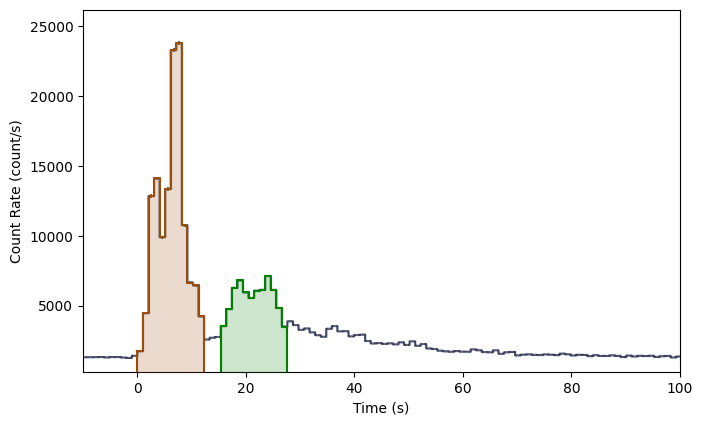

In [13]:
lcplot = Lightcurve(data=phaii.to_lightcurve())
plt.xlim(-10, 100)
lc_select = phaii.to_lightcurve(time_range=(0, 12.0))
lcplot.add_selection(lc_select)

lc_select2 = phaii.to_lightcurve(time_range=(16, 27))
lcplot.add_selection(lc_select2)
lcplot.selections[1].color = 'green'

Next, we visualize the energy spectrum of the GRB using the TTE data. We integrate between 0 and 12 seconds to obtain the intensity as a function of energy. The spectrum has a curved shape, with a clear peak reaching its maximum around 30 keV, this is the energy at which the largest number of photons is emitted. From approximately 100 keV onward, the rate decreases rapidly, which is a characteristic feature of GRBs. The sharp drop at the high-energy end may be due to the detector's limit, meaning it is likely not a real physical phenomenon.

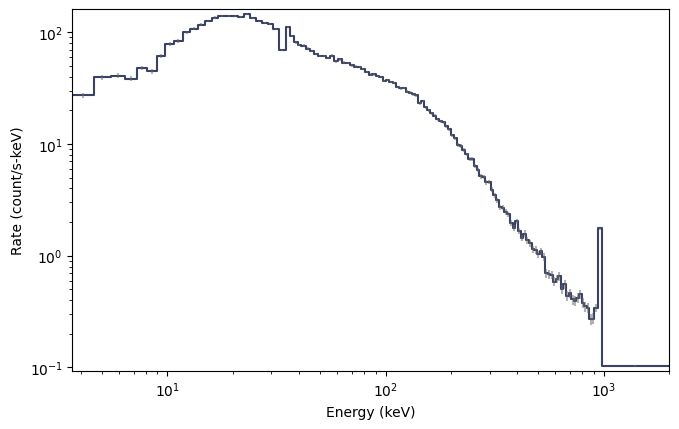

In [14]:
spectrum = tte.to_spectrum(time_range=(0.0, 12.0))
specplot = Spectrum(data=spectrum)
plt.show()

Here the spectral resolution is higher than what we need, so to reduce it we use .rebin_energy().

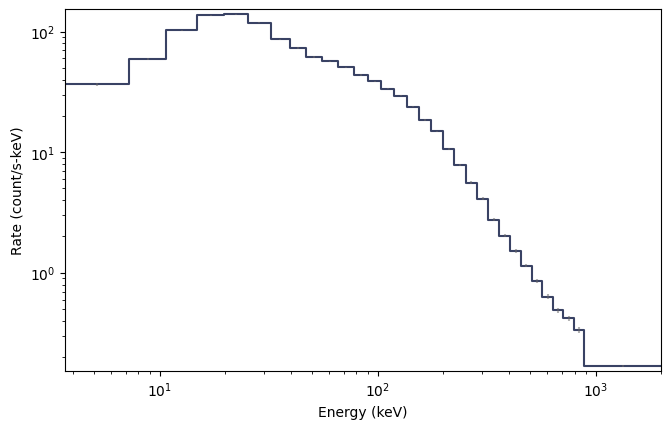

In [15]:
rebinned_energy = tte.rebin_energy(combine_by_factor, 4)
rebinned_spectrum = rebinned_energy.to_spectrum(time_range=(0.0, 12.0))
specplot = Spectrum(data=rebinned_spectrum)
plt.show()

Next, we plot two spectra from two different time intervals. The spectra correspond to the two regions we previously identified in the light curve. Specifically, the first spectrum is taken from the time interval between 0 and 12 seconds, while the second corresponds to the interval between 16 and 27 seconds (approximated earlier as between 15 and 30 seconds).

/bin/bash: -c: línea 1: error sintáctico cerca del elemento inesperado `0.02,'
/bin/bash: -c: línea 1: `axx.set_ylim(0.02, 200) for axx in [ax1, ax2]'


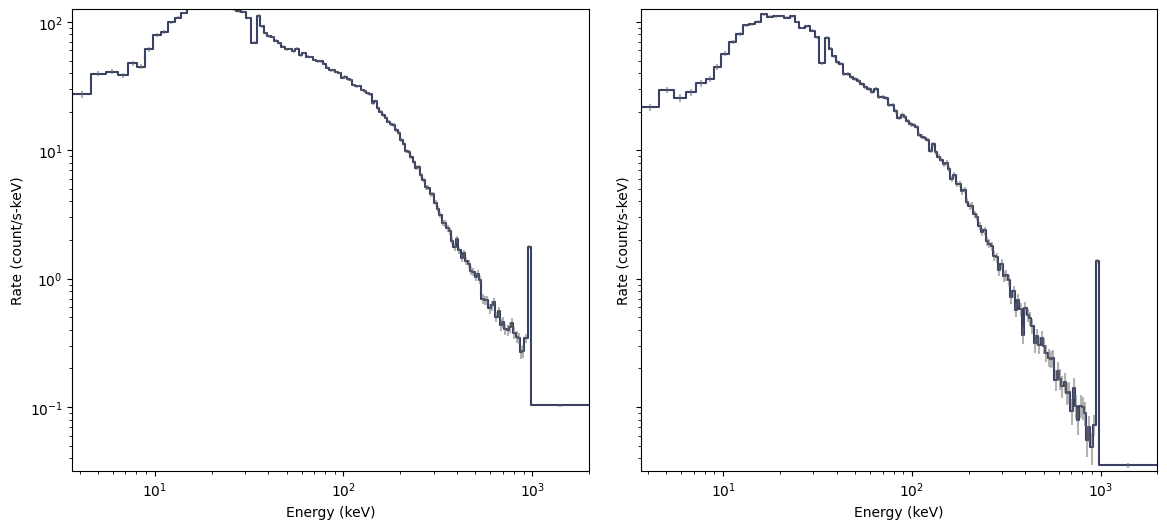

In [16]:
fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 2, hspace=0, wspace=0.1)
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')
spectrum = tte.to_spectrum(time_range=(0.0, 12.0))
spectrum_2 = tte.to_spectrum(time_range=(16, 27))
specplot = Spectrum(data= spectrum, ax=ax1)
specplot2 = Spectrum(data=spectrum_2, ax=ax2)
!axx.set_ylim(0.02, 200) for axx in [ax1, ax2]

We plot both spectra on the same graph. The brown-shaded spectrum corresponds to the first emission episode of the GRB, that is, the one associated with the time between 0 and 12 seconds.

(0.02, 200)

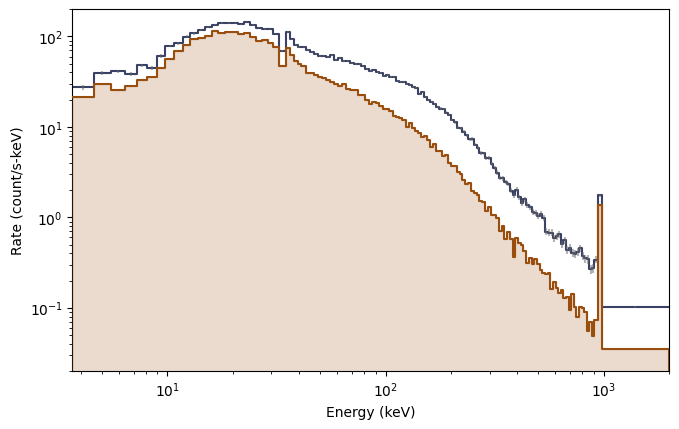

In [17]:
spectrum = tte.to_spectrum(time_range=(0.0, 12.0))
spectrum_2 = tte.to_spectrum(time_range=(16, 27))
specplot = Spectrum(data=spectrum)
specplot.add_selection(spectrum_2)
plt.ylim(0.02, 200)

# Conclusions

We have worked with data from the NASA catalog, which was obtained by downloading it through an HTTP request. Using the downloaded data, we generated a light curve and identified the emission pulses. We then extracted the emission spectrum corresponding to the identified time intervals.